In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

转换氨基酸三字符为单字符

In [ ]:
residue_dict = {
    "ALA": "A", "CYS": "C", "ASP": "D", "GLU": "E", "PHE": "F",
    "GLY": "G", "HIS": "H", "ILE": "I", "LYS": "K", "LEU": "L",
    "MET": "M", "ASN": "N", "PRO": "P", "GLN": "Q", "ARG": "R",
    "SER": "S", "THR": "T", "VAL": "V", "TRP": "W", "TYR": "Y"
}
sheets_nb = pd.read_excel("node_betweenness.xlsx", sheet_name= None)
with pd.ExcelWriter("node_betweenness_final.xlsx") as writer:
    for sheet_name, sheet_data in sheets_nb.items():
        sheet_data['res'] = sheet_data.iloc[:, 0].apply(lambda x: residue_dict.get(str(x)[:3], str(x)) + str(x)[3:] if pd.notnull(x) else x)
        sheet_data.to_excel(writer, index=None, sheet_name=sheet_name)


In [3]:
sheets = pd.read_excel("node_betweenness_final.xlsx", sheet_name= None)

In [ ]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(4, 3,   
                                            figsize=(40,40), dpi = 300)
name = ['4zt0', '4zt0_rep1', '4zt0_rep2',   
        '4un3', '4un3_rep1', '4un3_rep2',   
        '5xbl', '5xbl_rep1', '5xbl_rep2',   
        '6ifo', '6ifo_rep1', '6ifo_rep2']
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]
for ax, sheet_name in zip(ax_list, name):
    ax.plot(sheets[sheet_name][:, 1], )

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,  
                                figsize=(20,20),dpi = 300)
name = ['4zt0', '4zt0_rep1', '4zt0_rep2',   
        '4un3', '4un3_rep1', '4un3_rep2',   
        '5xbl', '5xbl_rep1', '5xbl_rep2',   
        '6ifo', '6ifo_rep1', '6ifo_rep2']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
ax_list = [ax1, ax2, ax3, ax4]
for sheet_name, color in zip(name[0:3], colors):
    ax1.plot(sheets[sheet_name][:, 1], color = color, linewidth = 2.0, alpha = 0.85)


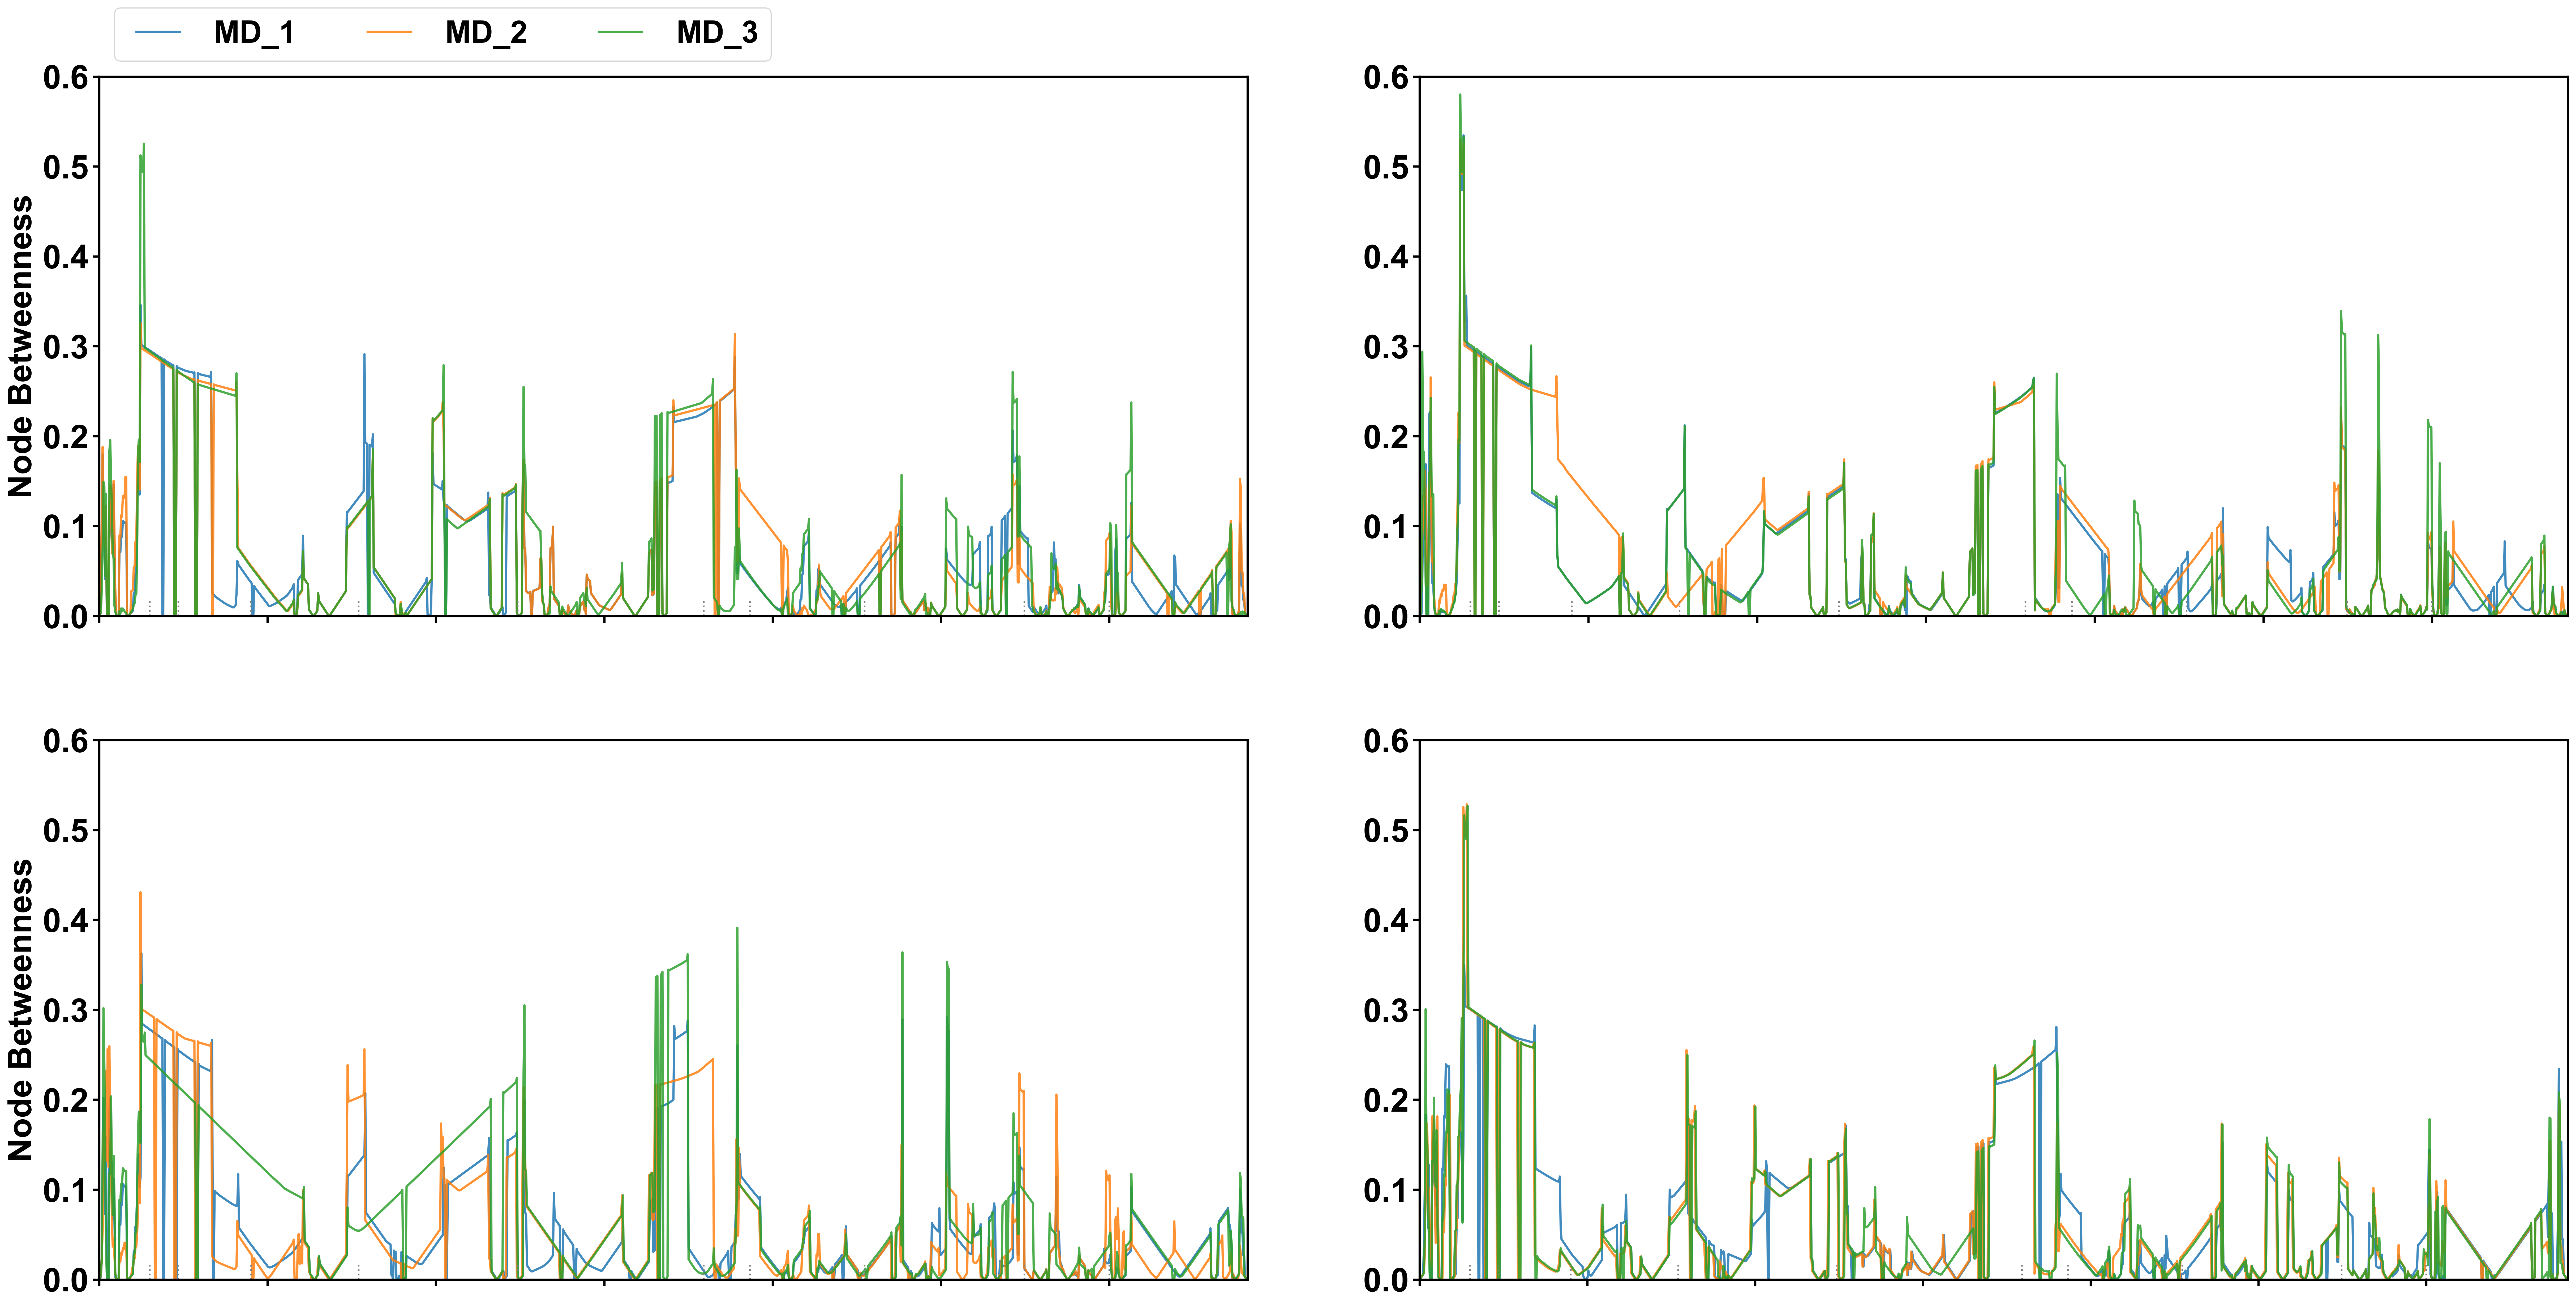

In [35]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(40,20), dpi = 300)
# plot 4zt0
ax1.plot( sheets['4zt0'].iloc[:,1], color = '#1f77b4', linewidth = 2.0, alpha = 0.85, label = 'MD_1')
ax1.plot( sheets['4zt0_rep1'].iloc[:,1], color = '#ff7f0e', linewidth = 2.0, alpha = 0.85, label = 'MD_2')
ax1.plot( sheets['4zt0_rep2'].iloc[:,1], color = '#2ca02c', linewidth = 2.0, alpha = 0.85, label = 'MD_3')
ax1.set_xlim(0, len(sheets['4zt0']))
ax1.legend(ncol = 3, bbox_to_anchor=(0, 1), loc='lower left',   
           borderaxespad=0.5, frameon = True, fontsize = 28,     
           numpoints = 20, markerscale = 10)

# plot 4un3
ax2.plot( sheets['4un3'].iloc[:,1], color = '#1f77b4', linewidth = 2.0, alpha = 0.85, label = 'MD_1')
ax2.plot( sheets['4un3_rep1'].iloc[:,1], color = '#ff7f0e', linewidth = 2.0, alpha = 0.85, label = 'MD_2')
ax2.plot( sheets['4un3_rep2'].iloc[:,1], color = '#2ca02c', linewidth = 2.0, alpha = 0.85, label = 'MD_3')
ax2.set_xlim(0, len(sheets['4un3']))

# plot 5xbl
ax3.plot( sheets['5xbl'].iloc[:,1], color = '#1f77b4', linewidth = 2.0, alpha = 0.85)
ax3.plot( sheets['5xbl_rep1'].iloc[:,1], color = '#ff7f0e', linewidth = 2.0, alpha = 0.85)
ax3.plot( sheets['5xbl_rep2'].iloc[:,1], color = '#2ca02c', linewidth = 2.0, alpha = 0.85)
ax3.set_xlim(0, len(sheets['5xbl']))

# plot 6ifo
ax4.plot( sheets['6ifo'].iloc[:,1], color = '#1f77b4', linewidth = 2.0, alpha = 0.85)
ax4.plot( sheets['6ifo_rep1'].iloc[:,1], color = '#ff7f0e', linewidth = 2.0, alpha = 0.85)
ax4.plot( sheets['6ifo_rep2'].iloc[:,1], color = '#2ca02c', linewidth = 2.0, alpha = 0.85)
ax4.set_xlim(0, len(sheets['6ifo']))


ax1.set_ylabel("Node Betweenness", fontsize = 30)
ax3.set_ylabel("Node Betweenness", fontsize = 30)

for ax in [ax1, ax2, ax3, ax4]:
    ax.tick_params(width=2, labelsize=30, length = 6)
    ax.set_ylim(0, 0.6)
    ax.set_xticklabels([])  # 隐藏横坐标数字
    bwith = 2.0
    ax.spines['bottom'].set_linewidth(bwith)
    ax.spines['left'].set_linewidth(bwith)
    ax.spines['top'].set_linewidth(bwith)
    ax.spines['right'].set_linewidth(bwith)

gap = [60, 94, 180, 308, 497, 718, 773, 909, 1099, 1200]
for i in gap:
    ax1.axvline(x = i, ymax = 0.03, color = 'gray', alpha = 1.0, ls = ':')
    ax2.axvline(x = i, ymax = 0.03, color = 'gray', alpha = 1.0, ls = ':')
    ax3.axvline(x = i, ymax = 0.03, color = 'gray', alpha = 1.0, ls = ':')
    ax4.axvline(x = i, ymax = 0.03, color = 'gray', alpha = 1.0, ls = ':')
fig.subplots_adjust(hspace=0.23, wspace= 0.15)
plt.savefig('node_betweenness_replia.tif', dpi=300, bbox_inches='tight')
plt.show()